In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import math
import EoN

from contact_tracing import *
from constraint import *
from solve import *
from simulation import *

In [2]:
G = load_graph('montgomery') #fetching the montgamery graph
n = len(G.nodes)
I0 = [i for i in range(n) if random.random() > 0.99]

In [ ]:
def MDP_wrapper(G: nx.graph, p, method, initial_iterations, MDP_iterations, visualization=False, verbose=False):
    
    full_data = EoN.basic_discrete_SIR(G=G, p=0.5, rho=.0001, tmin=0, tmax=1, return_full_data=True)
    
    for t in range(timesteps):
        #shock_I =  set([i for i in range(n) if random.random() < 0.001])
        
        #S = set([k for (k,v) in full_data.get_statuses(time=1).items() if v == 'S']).difference(shock_I)
        S = set([k for (k,v) in full_data.get_statuses(time=1).items() if v == 'S'])
        I = set([k for (k,v) in full_data.get_statuses(time=1).items() if v == 'I'])
        R = set([k for (k,v) in full_data.get_statuses(time=1).items() if v == 'R'])
        
        shock_I = random.sample(S, num_shocks)
        
        #update S, I to account for shocks
        S = S.difference(shock_I)
        I = I.union(shock_I)
        
        full_data = EoN.basic_discrete_SIR(G=G, p=p, initial_infecteds=I, initial_recovereds=R,tmin=0, tmax=1, return_full_data=True)
        print(len(S),len(R),len(I),len(shock_I))
    

In [14]:
S, I, R = initial(from_cache="Q4data.json")
print(len(I))

421


0 1287 70014 4156
1 1424 68590 5443
2 1525 67065 6867
3 1592 65473 8392
4 1601 63872 9984
5 1454 62418 11585
6 1291 61127 13039
7 1087 60040 14330
8 909 59131 15417
9 694 58437 16326
10 573 57864 17020
11 441 57423 17593
12 358 57065 18034
13 273 56792 18392
14 210 56582 18665
15 159 56423 18875
16 106 56317 19034
17 82 56235 19140
18 50 56185 19222
19 39 56146 19272
20 28 56118 19311
21 24 56094 19339
22 27 56067 19363
23 13 56054 19390
24 10 56044 19403
25 7 56037 19413
26 4 56033 19420
27 3 56030 19424
28 3 56027 19427
29 2 56025 19430
30 4 56021 19432
31 3 56018 19436
32 1 56017 19439
33 1 56016 19440


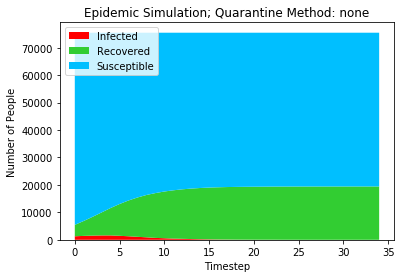

(19441, 1601, 34)

In [13]:
MDP(G, 400, S, I, R, p=0.05, iterations=-1, visualization=True, method="none", verbose=True)

In [15]:
df1 = pd.read_csv("../output/Q4_csvs/george_random_data.csv")
df2 = pd.read_csv("../output/Q4_csvs/george_degree_data.csv")
df3 = pd.read_csv("../output/Q4_csvs/george_dependent_data.csv")
df4 = pd.read_csv("../output/Q4_csvs/george_random_data2.csv")
df5 = pd.read_csv("../output/Q4_csvs/george_degree_data2.csv")
df6 = pd.read_csv("../output/Q4_csvs/george_dependent_data2.1.csv")
df7 = pd.read_csv("../output/Q4_csvs/george_random_data3.csv")
df8 = pd.read_csv("../output/Q4_csvs/george_degree_data3.csv")
df9 = pd.read_csv("../output/Q4_csvs/george_dependent_data3.csv")

In [16]:
df1 = pd.concat([df1,df4,df7]).reset_index(drop=True)
df2 = pd.concat([df2,df5,df8]).reset_index(drop=True)
df3 = pd.concat([df3,df6,df9]).reset_index(drop=True)


In [20]:
ks = np.array(df1['k'])
print(ks)

none_total = [a for _ in ks]
none_peak = [b for _ in ks]
#print(none_total)
#print(none_peak)

[ 500.  510.  520.  530.  540.  550.  560.  570.  580.  590.  600.  610.
  620.  630.  640.  650.  660.  670.  680.  690.  700.  710.  720.  730.
  740.  750.  760.  770.  780.  790.  800.  810.  820.  830.  840.  850.
  860.  870.  880.  890.  900.  910.  920.  930.  940.  950.  960.  970.
  980.  990. 1000. 1010. 1020. 1030. 1040. 1050. 1060. 1070. 1080. 1090.
 1100. 1110. 1120. 1130. 1140. 1150. 1160. 1170. 1180. 1190. 1200. 1210.
 1220. 1230. 1240. 1250. 1260. 1270. 1280. 1290. 1300. 1310. 1320. 1330.
 1340. 1350. 1360. 1370. 1380. 1390. 1400. 1410. 1420. 1430. 1440. 1450.
 1460. 1470. 1480. 1490. 1500. 1510. 1520. 1530. 1540. 1550. 1560. 1570.
 1580. 1590. 1600. 1610. 1620. 1630. 1640. 1650. 1660. 1670. 1680. 1690.
 1700. 1710. 1720. 1730. 1740. 1750. 1760. 1770. 1780. 1790. 1800. 1810.
 1820. 1830. 1840. 1850. 1860. 1870. 1880. 1890. 1900. 1910. 1920. 1930.
 1940. 1950. 1960. 1970. 1980. 1990. 2000.  100.  110.  120.  130.  140.
  150.  160.  170.  180.  190.  200.  210.  220.  2

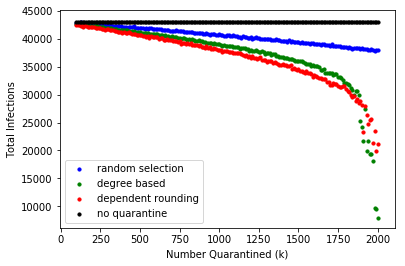

In [29]:
fig, ax = plt.subplots()

ax.scatter(df1['k'], df1['avg_total'], c='blue', s=10)

ax.scatter(df2['k'], df2['avg_total'], c='green', s=10)

ax.scatter(df3['k'], df3['avg_total'], c='red', s=10)

ax.scatter(ks, none_total, c='black', s=10)

#ax.set_title("Total Infections vs. Number Quarantined for Different Methods")
ax.set_xlabel("Number Quarantined (k)")
ax.set_ylabel("Total Infections")

ax.legend(['random selection','degree based','dependent rounding','no quarantine'])


plt.show()

fig.savefig("../output/Q4plots/compare_total1", dpi=400)

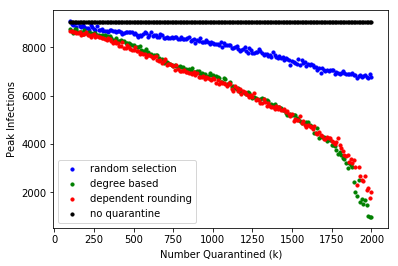

In [30]:
fig1, ax1 = plt.subplots()

ax1.scatter(df1['k'], df1['avg_peak'], c='blue', s=10)

ax1.scatter(df2['k'], df2['avg_peak'], c='green', s=10)

ax1.scatter(df3['k'], df3['avg_peak'], c='red', s=10)

ax1.scatter(ks, none_peak, c = 'black', s=10)

#ax1.set_title("Peak Infections vs. Number Quarantined for Different Methods")
ax1.set_xlabel("Number Quarantined (k)")
ax1.set_ylabel("Peak Infections")

ax1.legend(['random selection','degree based','dependent rounding', 'no quarantine'])

plt.show()

fig1.savefig("../output/Q4plots/compare_peak1", dpi=400)

In [26]:
(S, I, R) = initial(G, from_cache="Q4data.json")

In [19]:
print(a)
b

43010.6


9062.0

0 421 74686 350
1 878 73808 771
2 1808 72000 1649
3 3532 68468 3457
4 6229 62239 6989
5 8803 53436 13218
6 8866 44570 22021
7 6243 38327 30887
8 3242 35085 37130
9 1456 33629 40372
10 619 33010 41828
11 243 32767 42447
12 86 32681 42690
13 31 32650 42776
14 11 32639 42807
15 4 32635 42818
16 2 32633 42822


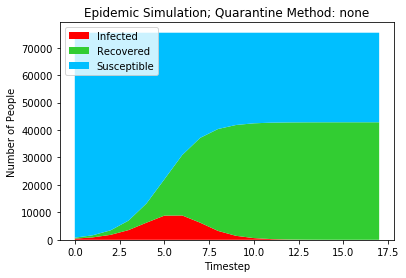

42824
8866
17
0 421 74686 350
1 961 73725 771
2 2045 71680 1732
3 4018 67662 3777
4 6782 60880 7795
5 9145 51735 14577
6 8552 43183 23722
7 5598 37585 32274
8 2888 34697 37872
9 1250 33447 40760
10 511 32936 42010
11 221 32715 42521
12 86 32629 42742
13 35 32594 42828
14 17 32577 42863
15 3 32574 42880


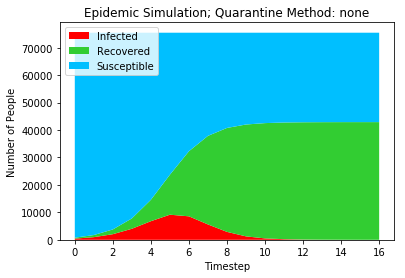

42883
9145
16
0 421 74686 350
1 914 73772 771
2 1881 71891 1685
3 3739 68152 3566
4 6647 61505 7305
5 9137 52368 13952
6 8846 43522 23089
7 5929 37593 31935
8 2907 34686 37864
9 1338 33348 40771
10 508 32840 42109
11 199 32641 42617
12 76 32565 42816
13 26 32539 42892
14 16 32523 42918
15 12 32511 42934
16 7 32504 42946
17 4 32500 42953
18 1 32499 42957


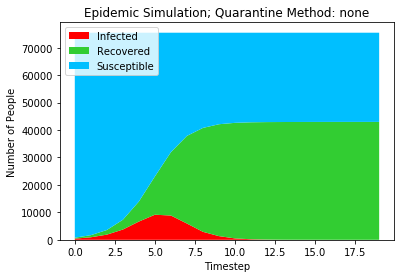

42958
9137
19
0 421 74686 350
1 900 73786 771
2 1938 71848 1671
3 3960 67888 3609
4 6762 61126 7569
5 9184 51942 14331
6 8818 43124 23515
7 5859 37265 32333
8 2952 34313 38192
9 1240 33073 41144
10 513 32560 42384
11 210 32350 42897
12 89 32261 43107
13 38 32223 43196
14 8 32215 43234
15 5 32210 43242


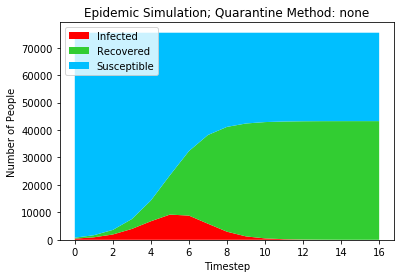

43247
9184
16
0 421 74686 350
1 895 73791 771
2 1888 71903 1666
3 3503 68400 3554
4 6263 62137 7057
5 8774 53363 13320
6 8978 44385 22094
7 6333 38052 31072
8 3240 34812 37405
9 1466 33346 40645
10 596 32750 42111
11 258 32492 42707
12 101 32391 42965
13 41 32350 43066
14 16 32334 43107
15 8 32326 43123
16 7 32319 43131
17 2 32317 43138
18 1 32316 43140


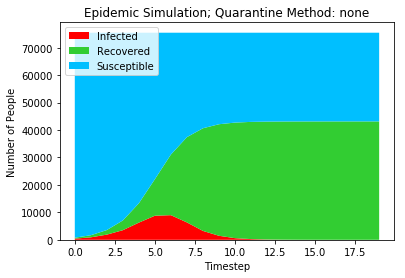

43141
8978
19


In [18]:
a = 0
b = 0

for i in range(5):
    (x,y,z) = MDP(G, 0, S, I, R, p=0.1, iterations=-1, visualization=True, method="none", verbose=True)
    a+=x
    b+=y
    
    print(x)
    print(y)
    print(z)
    
a/=5
b/=5

701 74162 594
1487 72275 1295
2741 69499 2836
4713 64751 5598
6891 57825 10350
8196 49597 17280
7086 42467 25533
4587 37834 32655
2414 35378 37277
1102 34238 39731
416 33780 40874
101 33641 41322
0 33752 41456
0 33974 41483
0 33974 41483


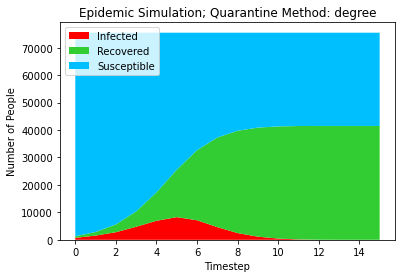

In [9]:
MDP(G, 400, S, I, R, p=0.1, iterations=15, visualization=True, method="degree")

In [5]:
import time
a = time.time()
MDP(G, 400, S, I, R, p=0.1, iterations=15, visualization=True, method="dependent", verbose=True)
print(time.time()-a)

421 74686 350


AttributeError: 'NoneType' object has no attribute 'NumVar'

In [ ]:
"""Stop here"""

In [8]:
COSTS = np.ones(n)

In [28]:
V_1,V_2 = find_excluded_contours(G,I,R)

In [41]:
degrees = []

for u in V_1:
    count = 0
    for v in G.neighbors(u):
        if v in V_2:
            count+=1

    degrees.append((count,u))

degrees.sort()
degrees.reverse()

sol = {}

for i in range(len(V_1)):
    if i < 100:
        sol[degrees[i][1]] = 1
    else:
        sol[degrees[i][1]] = 0

In [43]:
a = 0
for (k,v) in sol.items():
    a+=v
a

100

In [37]:
arr[:5]

[(65, 3751), (62, 27236), (61, 35651), (61, 34538), (60, 18733)]

In [13]:
P,Q = PQ(G,I,p=0.1, runs = 20)

In [20]:
prob = ProbMinExposed.from_dataframe(G,I,V_1,V_2,P,Q,800,COSTS)
#prob.solve_lp()
#prob.objectiveVal

In [21]:
sample = random.sample(range(0, len(V_1)), 800)
#just to not break stuff
prob.solve_lp()

for u in range(0,len(V_1)):
    #print(u)
    if u in sample:
        prob.setVariable(u, 0)
    else:
        prob.setVariable(u, 1)
#print(prob.partials)
print(len(V_1))
print(len(prob.partials))
print(prob.costs)
print(len(prob.costs))
#print(prob.filled())

prob.solve_lp()

3677
3677
[1. 1. 1. ... 1. 1. 1.]
75457


ValueError: Infeasible solution

In [22]:
print(prob.costs.sum())

75457.0


In [24]:
a = 0
for (k,v) in prob.partials.items():
    a += v
print(a)

2877


In [7]:
a = prob.getVariables()
#print(a.sum())
(val, c) = basic_non_integer_round(prob)
#print(c.sum())
#print(val1)
print(val)
#prob = ProbMinExposed.from_dataframe(G,I0,V_1,V_2,P,Q,800,COSTS)
#(val2, b) = iterated_round(prob,100)
#prob = ProbMinExposed.from_dataframe(G,I0,V_1,V_2,P,Q,800,COSTS)
#(val3, d) = optimized_iterated_round(prob, 100)
#print(val2)
#print(val3)
#for i in range(len(a)):
#    if (a[i] != 0) & (a[i] != 1):
#        print(str(a[i]) + " " + str(c[i]))
    
#print(len(a))
#a.sum()

15018.000000000515


In [49]:
for (k,v) in c.items(): 
    print(k)
    print(v)
    break

32768
0.0


In [20]:
print(len(V_1))
len(b)

11298


11298

In [13]:
a1=0
a2=0
a3=0
m1=10000000000
m2=10000000000
m3=10000000000

k=20

for i in range(k):
    prob = ProbMinExposed.from_dataframe(G,I0,V_1,V_2,P,Q,800,COSTS)
    optimized_iterated_round(prob, 500)
    prob.solve_lp()
    a1 += prob.objectiveVal
    
    if prob.objectiveVal < m1:
        m1 = prob.objectiveVal
    
    prob = ProbMinExposed.from_dataframe(G,I0,V_1,V_2,P,Q,800,COSTS)
    iterated_round(prob, 500)
    prob.solve_lp()
    a2 += prob.objectiveVal
    
    if prob.objectiveVal < m2:
        m2 = prob.objectiveVal

    prob = ProbMinExposed.from_dataframe(G,I0,V_1,V_2,P,Q,800,COSTS)
    basic_non_integer_round(prob)
    prob.solve_lp()
    a3 += prob.objectiveVal
        
    if prob.objectiveVal < m3:
        m3 = prob.objectiveVal
    
    print(i)
    
a1 /= k
a2 /= k
a3 /= k

print("Average: " + str(a1) + " " + str(a2) + " " + str(a3))
print("Best: " + str(m1) + " " + str(m2) + " " + str(m3))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
Average: 13995.412500000286 13970.625000000266 14023.225000000264
Best: 13966.450000000283 13950.600000000224 13992.000000000284


In [8]:
#p1 = defaultdict(lambda: .7)
#q = defaultdict(lambda: defaultdict(lambda : .7))
#prob = ProbMinExposed(G,I0,V_1,V_2,p1,q,10,COSTS)

In [ ]:
#test simplify

a = 1
b = 0

total_a = 0
total_b = 0

n=1000000

for i in range(n):
    (x,y,new_a,new_b) = simplify(a,b)
    
    if x==-1:
        total_a += new_a
        total_b += y
    elif y==-1:
        total_a += x
        total_b += new_b
    else:
        total_a += x
        total_b += y

print(str(total_a/n) + " " + str(a))
print(str(total_b/n) + " " + str(b))

In [ ]:
#test D
p = [.5,.5,.25,.6,.15]

n=10000
total = np.zeros(5)

for i in range(n):
    a = D(p)
    if np.sum(a) != np.sum(p):
        print("oof")
    #print(p)
    total += a
    
total/=n
print(total)

In [ ]:
#test D_prime
p = [.5,.4,.25,.75,.7]

n=5000
total = np.zeros(5)

for i in range(n):
    a = D(p)
    if (np.sum(a) != math.floor(np.sum(p))) & (np.sum(a) != math.ceil(np.sum(p))):
        print("oof")
    #print(p)
    total += a
    
total/=n
print(total)